# Dogs breeds

https://youtu.be/JNxcznsrRb8?t=1h31m8s

In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [15]:
torch.cuda.set_device(1)

In [16]:
PATH = "data/drugs/pics/"
sz = 224
arch = resnext101_64
bs = 128

label_csv = f'{PATH}3labels.csv'
n = len(list(open(label_csv))) - 1 # header is not counted (-1)
val_idxs = get_cv_idxs(n,seed=random.sample(range(1000), 1)) # random 20% data for validation set

## Initial model

In [17]:
def get_data(sz, bs, val_idxs): # sz: image size, bs: batch size
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}3labels.csv',
                                       val_idxs=val_idxs, suffix='.png', tfms=tfms, bs=bs)
    return data if sz > 300 else data.resize(340, 'tmp') # Reading the jpgs and resizing is slow for big images, so resizing them all to 340 first saves time


### Precompute

In [18]:
def k_fold_cross_loop1(k, epochs, bs):
    validation_accuracy = []
    for reps in range(k):
        val_idxs = get_cv_idxs(n, seed=random.sample(range(1000), 1)) # random 20% data for validation set
        data = get_data(sz, bs, val_idxs)
        learn = ConvLearner.pretrained(arch, data, precompute=True)
        val_loss, val_acc = learn.fit(1e-2, epochs)
        validation_accuracy.append(val_acc)
        learn.save(str(reps)+'_3cls_10fold.model')
    return validation_accuracy

In [ ]:
v_a = k_fold_cross_loop1(10,200,200)

epoch      trn_loss   val_loss   accuracy                 
    0      1.082428   0.893146   0.595349  
    1      0.937164   0.847831   0.630698                  
    2      0.864589   0.820164   0.64186                   
    3      0.803079   0.798268   0.649302                  
    4      0.755609   0.798082   0.666047                  
    5      0.720466   0.782393   0.664186                  
    6      0.693629   0.75844    0.686512                  
    7      0.672639   0.752539   0.67907                   
    8      0.649167   0.752267   0.691163                  
    9      0.625356   0.765875   0.672558                  
    10     0.610798   0.740797   0.666047                  
    11     0.600115   0.725843   0.691163                  
    12     0.582194   0.736498   0.688372                  
    13     0.575747   0.750157   0.67907                   
    14     0.556026   0.72897    0.697674                  
    15     0.534883   0.745649   0.690233                

   135     0.174764   0.926356   0.745116                  
   136     0.180361   0.955911   0.739535                  
   137     0.179099   0.93259    0.739535                  
   138     0.172065   0.921189   0.739535                  
   139     0.174497   0.926973   0.741395                  
   140     0.174721   0.942037   0.738605                  
   141     0.174387   0.939967   0.740465                  
   142     0.169221   0.940541   0.728372                  
   143     0.163354   0.948158   0.734884                  
   144     0.164596   0.958318   0.729302                  
   145     0.173311   0.953618   0.729302                  
   146     0.16589    0.969783   0.734884                  
   147     0.168151   0.957577   0.733023                  
   148     0.166201   0.956449   0.733953                  
   149     0.160794   0.954914   0.735814                  
   150     0.162215   0.983884   0.733953                  
   151     0.165545   0.97544    0.72837

epoch      trn_loss   val_loss   accuracy                 
    0      1.072064   0.856998   0.615814  
    1      0.91575    0.809448   0.646512                  
    2      0.83529    0.785833   0.653953                  
    3      0.786819   0.766103   0.657674                  
    4      0.752897   0.768413   0.667907                  
    5      0.718568   0.767966   0.666047                  
    6      0.688864   0.747331   0.667907                  
    7      0.658208   0.72378    0.685581                  
    8      0.637758   0.697137   0.703256                  
    9      0.618858   0.710435   0.688372                  
    10     0.593951   0.689882   0.706977                  
    11     0.574097   0.692829   0.710698                  
    12     0.560845   0.68936    0.727442                  
    13     0.545475   0.668319   0.710698                  
    14     0.534441   0.675486   0.712558                  
    15     0.512338   0.674481   0.722791                

   135     0.167294   0.822084   0.750698                  
   136     0.168727   0.840172   0.737674                  
   137     0.167354   0.811289   0.745116                  
   138     0.169443   0.833756   0.749767                  
   139     0.164545   0.811686   0.743256                  
   140     0.163646   0.802147   0.746977                  
   141     0.154362   0.849802   0.733023                  
   142     0.158037   0.830189   0.749767                  
   143     0.162726   0.805921   0.746977                  
   144     0.162662   0.806092   0.746977                  
   145     0.159683   0.810871   0.745116                  
   146     0.154797   0.813735   0.749767                  
   147     0.157851   0.824045   0.740465                  
   148     0.162475   0.810373   0.747907                  
   149     0.158612   0.808852   0.753488                  
   150     0.160465   0.83609    0.752558                  
   151     0.159621   0.816194   0.74883

epoch      trn_loss   val_loss   accuracy                 
    0      1.04527    0.886909   0.611163  
    1      0.932057   0.848691   0.622326                  
    2      0.856383   0.837951   0.619535                  
    3      0.801584   0.812044   0.643721                  
    4      0.756045   0.801358   0.650233                  
    5      0.716925   0.781133   0.662326                  
    6      0.701786   0.773765   0.668837                  
    7      0.670261   0.764345   0.671628                  
    8      0.648019   0.7447     0.689302                  
    9      0.633842   0.742504   0.68186                   
    10     0.615597   0.749803   0.688372                  
    11     0.594399   0.740093   0.692093                  
    12     0.57292    0.721759   0.702326                  
    13     0.561556   0.749712   0.696744                  
    14     0.548305   0.729001   0.697674                  
    15     0.530837   0.717324   0.699535                

   135     0.17158    0.882326   0.742326                  
   136     0.171627   0.869959   0.733023                  
   137     0.166839   0.89224    0.739535                  
   138     0.16489    0.899922   0.745116                  
   139     0.169525   0.891828   0.742326                  
   140     0.165123   0.894556   0.739535                  
   141     0.161843   0.90081    0.733953                  
   142     0.166316   0.902678   0.733953                  
   143     0.170188   0.89974    0.733953                  
   144     0.17102    0.904341   0.729302                  
   145     0.15773    0.900008   0.738605                  
   146     0.155093   0.881814   0.735814                  
   147     0.155997   0.91596    0.733953                  
   148     0.155962   0.906349   0.732093                  
   149     0.160678   0.904986   0.733023                  
   150     0.158147   0.905211   0.732093                  
   151     0.155111   0.912443   0.73488

epoch      trn_loss   val_loss   accuracy                 
    0      1.057624   0.85219    0.626047  
    1      0.919705   0.811833   0.646512                  
    2      0.845149   0.767229   0.659535                  
    3      0.794241   0.798174   0.655814                  
    4      0.75568    0.757002   0.674419                  
    5      0.715189   0.753033   0.671628                  
    6      0.688509   0.779001   0.656744                  
    7      0.66129    0.735571   0.68                      
    8      0.640523   0.718196   0.696744                  
    9      0.614924   0.718168   0.684651                  
    10     0.601256   0.694418   0.711628                  
    11     0.582119   0.705438   0.708837                  
    12     0.560599   0.701572   0.704186                  
    13     0.548001   0.7125     0.699535                  
    14     0.535185   0.694013   0.711628                  
    15     0.532902   0.689848   0.72093                 

   135     0.164314   0.847538   0.733023                  
   136     0.167551   0.879371   0.739535                  
   137     0.16818    0.842694   0.743256                  
   138     0.169999   0.848346   0.742326                  
   139     0.167625   0.83384    0.749767                  
   140     0.164506   0.856635   0.745116                  
   141     0.164328   0.840494   0.752558                  
   142     0.162268   0.838614   0.746047                  
   143     0.159062   0.842908   0.741395                  
   144     0.162111   0.862533   0.735814                  
   145     0.157283   0.863925   0.736744                  
   146     0.160054   0.854942   0.738605                  
   147     0.159418   0.865534   0.736744                  
   148     0.157691   0.859946   0.737674                  
   149     0.159968   0.87384    0.746047                  
   150     0.165573   0.880446   0.734884                 
   151     0.165558   0.85391    0.751628

epoch      trn_loss   val_loss   accuracy                 
    0      1.066126   0.925577   0.591628  
    1      0.923518   0.847359   0.614884                  
    2      0.849016   0.830009   0.625116                  
    3      0.799584   0.777279   0.661395                  
    4      0.762304   0.784875   0.658605                  
    5      0.732171   0.767574   0.666047                  
    6      0.702414   0.758057   0.667907                  
    7      0.672446   0.748148   0.687442                  
    8      0.652604   0.731264   0.699535                  
    9      0.628207   0.722137   0.696744                  
    10     0.607928   0.729005   0.693023                  
    11     0.587025   0.712258   0.697674                  
    12     0.571302   0.732256   0.706047                  
    13     0.556666   0.717184   0.699535                  
    14     0.551646   0.711297   0.707907                  
    15     0.535314   0.70639    0.704186                

In [50]:
print(v_a)

[0.7358139539319415, 0.7367441863791887, 0.7423255817834721, 0.7460465120160302, 0.7386046516063601, 0.733953488649324, 0.7423255817834721, 0.7432558143416116, 0.7367441864900811, 0.7479069770768632]


In [52]:

print('mean='+str(np.mean(v_a)))
print('stdev.='+str(np.std(v_a)))

mean=0.7403720934058345
stdev.=0.004431071761999424


In [54]:
plt.rcParams['figure.figsize'] = [5, 5]

[[0.69 0.12 0.2 ]                            
 [0.13 0.51 0.35]
 [0.11 0.13 0.76]]


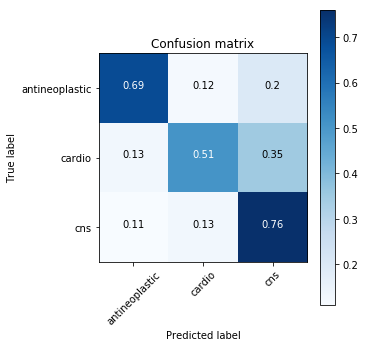

In [57]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)
adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data.classes)

### Augment

In [32]:
from sklearn import metrics

In [70]:
def kfoldx_loop2(k, epochs, name, precomp, bs):
    validation_accuracy = []
    for reps in range(k):
        val_idxs = get_cv_idxs(n, seed=random.sample(range(1000), 1)) # random 20% data for validation set
        data = get_data(sz, bs)
        learn = ConvLearner.pretrained(arch, data, precompute=precomp, ps =0.5)
        val_loss, val_acc = learn.fit(1e-2, epochs)
        validation_accuracy.append(val_acc)
        learn.save(str(reps)+name)
    return validation_accuracy, learn

In [ ]:
v_a, learn = kfoldx_loop2(10,200,'_aug_3cls_10fldx.model', False, 200)

epoch      trn_loss   val_loss   accuracy                 
    0      1.175313   0.91654    0.579535  
    1      1.062641   0.880123   0.60186                  
    2      1.002226   0.872993   0.605581                 
    3      0.960023   0.857914   0.620465                  
    4      0.9271     0.841847   0.627907                  
    5      0.909901   0.826804   0.627907                  
    6      0.891133   0.819678   0.636279                  
    7      0.874831   0.818093   0.628837                  
    8      0.859965   0.804972   0.64                      
    9      0.853661   0.798769   0.633488                  
    10     0.834958   0.797326   0.642791                  
    11     0.83243    0.785742   0.652093                  
    12     0.822138   0.788079   0.650233                  
    13     0.818411   0.78963    0.649302                  
    14     0.813005   0.775093   0.646512                  
    15     0.810052   0.773537   0.642791                  

[[0.79 0.09 0.12]                            
 [0.09 0.66 0.25]
 [0.05 0.17 0.77]]


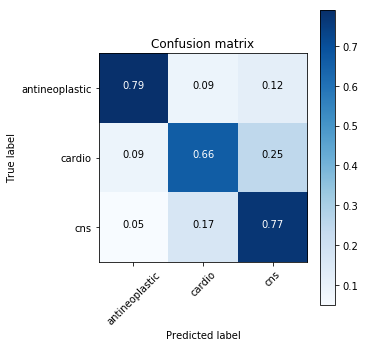

In [66]:
learn.load('1_aug_3cls_10fldx.model')
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)
adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data.classes)

[[0.78 0.09 0.13]                            
 [0.1  0.68 0.22]
 [0.05 0.17 0.78]]


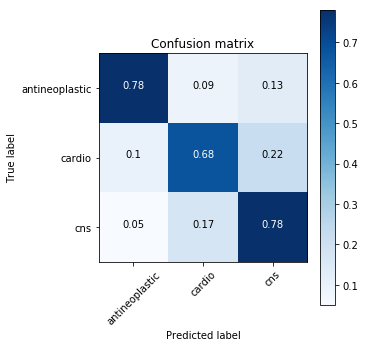

In [67]:
learn.load('9_3cls_10fold.model')
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)
adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data.classes)

In [10]:
### compare dropout values - 0, 0.2, 0.4, 0.6, 0.8, train twice each


def kfld_loop3(k, epochs, name, precomp, bs, dropouts):
    #dropoutlist = []
    validation_accuracy = []
    for do in dropouts:
        for reps in range(k):
            val_idxs = get_cv_idxs(n, seed=random.sample(range(1000), 1)) # random 20% data for validation set
            data = get_data(sz, bs)
            print('dropout='+str(do))
            learn = ConvLearner.pretrained(arch, data, precompute=precomp, ps = do)
            val_loss, val_acc = learn.fit(1e-2, epochs)
            validation_accuracy.append(val_acc)
            learn.save(str(reps)+name)
    return validation_accuracy, learn

In [12]:
dropouts = [0, 0.2, 0.4,0.5,0.6,0.8]
#dropouts = [0, 0, 0.2, 0.2]
v_a1, learn1 = kfld_loop3(3, 200, '3cls_preT_dotest_200ep.model', True, 200, dropouts) # precomupte, test dropouts
v_a2, learn2 = kfld_loop3(3, 200, '3cls_preF_dotest_200ep.model', False, 200, dropouts) # no precom, test dropouts
v_a3, learn3 = kfld_loop3(3, 500, '3cls_preT_dotest_500ep.model', True, 200, dropouts) # precomupte, test dropouts
v_a4, learn4 = kfld_loop3(3, 500, '3cls_preF_dotest_500ep.model', False, 200, dropouts) # no precom, test dropouts


dropout=0


epoch      trn_loss   val_loss   accuracy                
    0      0.976561   0.89415    0.593488  
    1      0.808688   0.791851   0.663256                 
    2      0.70985    0.773325   0.670698                 
    3      0.625495   0.739861   0.684651                 
    4      0.556548   0.725481   0.696744                 
    5      0.491422   0.722146   0.706047                 
    6      0.435993   0.699665   0.697674                  
    7      0.383896   0.710502   0.704186                  
    8      0.34035    0.720761   0.72093                  
    9      0.304428   0.714908   0.72186                  
    10     0.277996   0.702172   0.717209                 
    11     0.250573   0.754226   0.712558                  
    12     0.229333   0.763109   0.72186                  
    13     0.21233    0.782533   0.733953                 
    14     0.200056   0.798922   0.712558                  
    15     0.186432   0.843511   0.712558                  
    16  

   136     0.095117   0.954761   0.734884                  
   137     0.093233   0.941975   0.732093                  
   138     0.093606   0.989867   0.730233                  
   139     0.092938   0.955021   0.734884                  
   140     0.091096   0.943311   0.733953                  
   141     0.090876   0.950743   0.735814                  
   142     0.090045   0.932722   0.739535                  
   143     0.090288   0.955786   0.737674                  
   144     0.089594   0.956105   0.731163                  
   145     0.091193   0.942268   0.738605                  
   146     0.090954   0.971752   0.731163                  
   147     0.091107   0.945832   0.733954                  
   148     0.091138   0.967122   0.735814                  
   149     0.091536   0.993608   0.731163                  
   150     0.09058    0.961263   0.730233                  
   151     0.092835   0.971904   0.732093                  
   152     0.091382   0.945454   0.73581

dropout=0


epoch      trn_loss   val_loss   accuracy                
    0      0.967924   0.886246   0.587907  
    1      0.805155   0.814728   0.63814                  
    2      0.701167   0.751001   0.666047                 
    3      0.6177     0.731335   0.684651                 
    4      0.548655   0.750697   0.702326                 
    5      0.491624   0.782631   0.68                     
    6      0.439223   0.710653   0.713488                 
    7      0.388512   0.722166   0.707907                 
    8      0.34377    0.752126   0.701395                 
    9      0.307103   0.771196   0.708837                  
    10     0.274356   0.790897   0.71814                  
    11     0.247958   0.798353   0.705116                 
    12     0.23029    0.827776   0.693023                 
    13     0.210442   0.816744   0.706977                  
    14     0.196574   0.804717   0.707907                 
    15     0.18765    0.831259   0.709767                 
    16     

   136     0.089979   1.038088   0.726512                  
   137     0.08956    1.020883   0.727442                  
   138     0.088206   0.991515   0.71907                   
   139     0.09006    1.007406   0.722791                  
   140     0.089794   1.015875   0.72093                   
   141     0.088377   1.023298   0.722791                  
   142     0.089454   0.995448   0.71907                    
   143     0.089587   1.021442   0.71907                    
   144     0.089415   1.008898   0.728372                  
   145     0.092241   1.006803   0.731163                   
   146     0.093292   1.027898   0.726512                  
   147     0.092399   0.994664   0.723721                  
   148     0.090966   1.029633   0.705116                  
   149     0.089337   1.029756   0.725581                  
   150     0.090238   1.016605   0.732093                  
   151     0.091534   0.999423   0.728372                  
   152     0.08906    1.04401    0.71

dropout=0


epoch      trn_loss   val_loss   accuracy                
    0      0.958261   0.884483   0.592558  
    1      0.805154   0.789172   0.658605                 
    2      0.700371   0.754372   0.686512                 
    3      0.619522   0.782857   0.672558                 
    4      0.543764   0.713626   0.702326                  
    5      0.480376   0.745043   0.686512                 
    6      0.42608    0.738548   0.709767                  
    7      0.376295   0.772442   0.697674                  
    8      0.336189   0.759992   0.716279                 
    9      0.298836   0.756349   0.717209                  
    10     0.268499   0.785536   0.725581                 
    11     0.243611   0.787404   0.710698                 
    12     0.224611   0.811039   0.72                     
    13     0.20897    0.813631   0.709767                 
    14     0.200493   0.815753   0.711628                 
    15     0.190438   0.785035   0.731163                  
    16  

   136     0.092077   0.968265   0.729302                   
   137     0.091319   0.966185   0.735814                   
   138     0.092402   0.991395   0.729302                  
   139     0.091438   0.961198   0.733953                   
   140     0.091127   0.973941   0.732093                  
   141     0.089884   0.957743   0.736744                  
   142     0.087655   0.981176   0.727442                  
   143     0.08882    0.967728   0.733023                  
   144     0.088077   0.989076   0.730233                  
   145     0.087182   0.995062   0.729302                  
   146     0.088314   0.975528   0.732093                   
   147     0.089485   1.014566   0.731163                   
   148     0.090059   1.008623   0.72186                    
   149     0.089471   1.005679   0.725581                   
   150     0.088332   1.006471   0.729302                   
   151     0.088388   0.992594   0.737674                  
   152     0.087618   0.976936  

dropout=0.2


epoch      trn_loss   val_loss   accuracy                
    0      1.048344   0.904908   0.589767  
    1      0.903681   0.825887   0.63907                   
    2      0.813236   0.803121   0.644651                  
    3      0.750448   0.760781   0.668837                 
    4      0.69624    0.759492   0.668837                  
    5      0.651102   0.747888   0.670698                  
    6      0.613241   0.722921   0.705116                  
    7      0.582077   0.708255   0.696744                  
    8      0.547954   0.718797   0.714419                 
    9      0.525183   0.706989   0.701395                  
    10     0.496101   0.705474   0.717209                 
    11     0.474321   0.705128   0.715349                 
    12     0.454314   0.709777   0.72186                   
    13     0.43422    0.715614   0.717209                  
    14     0.415985   0.716511   0.715349                 
    15     0.405369   0.696714   0.701395                 
    

   137     0.126167   0.929969   0.741395                 
   138     0.126714   0.926401   0.737674                 
   139     0.121405   0.939478   0.737674                 
   140     0.12332    0.929406   0.732093                 
   141     0.121988   0.940203   0.733023                 
   142     0.122186   0.929713   0.744186                  
   143     0.121553   0.914618   0.742326                  
   144     0.122821   0.944583   0.737674                  
   145     0.122906   0.943514   0.739535                 
   146     0.121947   0.929732   0.741395                 
   147     0.120036   0.943852   0.742326                 
   148     0.119952   0.927662   0.740465                  
   149     0.120419   0.943376   0.744186                  
   150     0.119464   0.952295   0.743256                  
   151     0.117394   0.929757   0.736744                 
   152     0.119906   0.936081   0.736744                  
   153     0.121499   0.944234   0.733023        

dropout=0.2


epoch      trn_loss   val_loss   accuracy                
    0      1.056989   0.899738   0.597209  
    1      0.907198   0.846327   0.631628                 
    2      0.818235   0.788919   0.653023                 
    3      0.75639    0.770096   0.661395                 
    4      0.706775   0.750895   0.664186                 
    5      0.660724   0.734085   0.67907                  
    6      0.620112   0.715348   0.683721                 
    7      0.583918   0.707131   0.691163                 
    8      0.546263   0.714814   0.685581                 
    9      0.515689   0.7016     0.700465                 
    10     0.492439   0.693544   0.713488                 
    11     0.472544   0.727645   0.709767                  
    12     0.451543   0.709795   0.714419                 
    13     0.430217   0.701511   0.705116                 
    14     0.414269   0.707237   0.715349                 
    15     0.393748   0.712855   0.725581                 
    16     0

   137     0.125349   0.936705   0.740465                 
   138     0.123554   0.965351   0.736744                 
   139     0.123122   0.955865   0.737674                 
   140     0.124654   0.960079   0.735814                 
   141     0.123552   0.930993   0.738605                 
   142     0.124143   0.908237   0.748837                  
   143     0.121924   0.936006   0.740465                  
   144     0.124308   0.955202   0.739535                 
   145     0.125089   0.95522    0.733023                  
   146     0.126543   0.940287   0.741395                  
   147     0.124967   0.917387   0.746047                  
   148     0.120546   0.91882    0.744186                  
   149     0.118192   0.94922    0.742326                  
   150     0.120582   0.937378   0.738605                 
   151     0.121239   0.92755    0.744186                 
   152     0.120944   0.951457   0.735814                  
   153     0.116956   0.935271   0.742326       

dropout=0.2


epoch      trn_loss   val_loss   accuracy                
    0      1.034849   0.908525   0.586047  
    1      0.883341   0.839147   0.626047                 
    2      0.799499   0.786893   0.661395                 
    3      0.740358   0.764529   0.675349                 
    4      0.693311   0.750364   0.687442                 
    5      0.647464   0.739792   0.693953                 
    6      0.613199   0.755607   0.668837                 
    7      0.574496   0.727506   0.693953                 
    8      0.550085   0.733572   0.697674                 
    9      0.520468   0.716856   0.705116                 
    10     0.494108   0.705585   0.72093                   
    11     0.472175   0.748433   0.706977                  
    12     0.450416   0.723127   0.701395                  
    13     0.422446   0.726363   0.72186                  
    14     0.408633   0.732113   0.72093                  
    15     0.389086   0.714925   0.723721                 
    16    

   137     0.126043   0.937138   0.745116                  
   138     0.126439   0.918287   0.751628                 
   139     0.124618   0.957131   0.745116                 
   140     0.125836   0.950633   0.745116                 
   141     0.12535    0.928214   0.751628                  
   142     0.126075   0.92019    0.753488                 
   143     0.126864   0.920123   0.746977                 
   144     0.123881   0.926172   0.738605                  
   145     0.12269    0.919522   0.756279                  
   146     0.11938    0.93914    0.738605                 
   147     0.121231   0.923492   0.753488                  
   148     0.120662   0.934693   0.748837                  
   149     0.121765   0.930724   0.746047                  
   150     0.119799   0.935057   0.738605                 
   151     0.121371   0.928426   0.753488                 
   152     0.123531   0.919321   0.743256                 
   153     0.126271   0.914771   0.746977        

dropout=0.4


epoch      trn_loss   val_loss   accuracy                
    0      1.110152   0.921717   0.566512  
    1      0.973497   0.868315   0.610233                
    2      0.900606   0.835363   0.624186                 
    3      0.849173   0.815308   0.632558                 
    4      0.809031   0.793035   0.662326                 
    5      0.781293   0.78314    0.664186                 
    6      0.75578    0.778201   0.655814                 
    7      0.735832   0.775821   0.659535                 
    8      0.718845   0.760639   0.671628                  
    9      0.695298   0.732159   0.694884                  
    10     0.675533   0.742846   0.674419                 
    11     0.65889    0.726868   0.691163                 
    12     0.649705   0.728218   0.686512                 
    13     0.639708   0.7328     0.687442                 
    14     0.625095   0.700923   0.706047                 
    15     0.60682    0.709523   0.695814                 
    16     0

   137     0.208356   0.807297   0.738605                 
   138     0.208974   0.791653   0.746047                 
   139     0.212694   0.787743   0.741395                  
   140     0.213549   0.787025   0.744186                  
   141     0.208542   0.804415   0.738605                  
   142     0.204594   0.795734   0.743256                 
   143     0.205979   0.792095   0.748837                 
   144     0.210433   0.808556   0.746046                 
   145     0.210873   0.794323   0.749767                
   146     0.207092   0.805487   0.734884                 
   147     0.203297   0.810661   0.750698                 
   148     0.199153   0.812324   0.743256                 
   149     0.202249   0.804213   0.745116                 
   150     0.205102   0.821313   0.742326                 
   151     0.201769   0.803835   0.741395                 
   152     0.198805   0.83242    0.736744                 
   153     0.200834   0.815854   0.741395             

dropout=0.4


epoch      trn_loss   val_loss   accuracy                
    0      1.090505   0.901989   0.590698  
    1      0.96797    0.86654    0.592558                
    2      0.898789   0.82183    0.627907                 
    3      0.850652   0.798394   0.643721                 
    4      0.818542   0.783724   0.643721                 
    5      0.786948   0.774489   0.655814                 
    6      0.763274   0.76977    0.669767                 
    7      0.740497   0.753734   0.666046                 
    8      0.720032   0.759365   0.663256                 
    9      0.701579   0.736537   0.683721                
    10     0.680784   0.721249   0.693953                  
    11     0.663431   0.730511   0.67814                   
    12     0.649687   0.724809   0.686512                  
    13     0.639798   0.707358   0.708837                 
    14     0.623395   0.712856   0.696744                  
    15     0.61412    0.712783   0.703256                  
    16    

   137     0.218872   0.792435   0.743256                 
   138     0.212864   0.80332    0.739535                  
   139     0.212999   0.778108   0.746977                  
   140     0.215412   0.781958   0.742326                  
   141     0.213701   0.771126   0.744186                  
   142     0.206148   0.770292   0.739535                  
   143     0.204442   0.786113   0.746047                  
   144     0.204539   0.777607   0.743256                  
   145     0.206301   0.78433    0.746047                  
   146     0.209932   0.793493   0.745116                  
   147     0.207399   0.783024   0.743256                  
   148     0.203586   0.800206   0.738605                  
   149     0.20508    0.797697   0.745116                  
   150     0.200477   0.783608   0.745116                 
   151     0.197231   0.77735    0.746047                  
   152     0.19926    0.780702   0.749767                  
   153     0.199551   0.78791    0.745116 

dropout=0.4


epoch      trn_loss   val_loss   accuracy                
    0      1.104236   0.905147   0.581395  
    1      0.967796   0.860516   0.613953                
    2      0.894448   0.854143   0.615814                 
    3      0.843534   0.816633   0.632558                 
    4      0.809574   0.79952    0.643721                 
    5      0.781922   0.78324    0.655814                 
    6      0.757489   0.773981   0.665116                 
    7      0.736232   0.762812   0.660465                 
    8      0.712212   0.74923    0.674419                 
    9      0.694229   0.752424   0.661395                  
    10     0.679856   0.756006   0.658605                  
    11     0.665093   0.750009   0.67814                   
    12     0.650106   0.723468   0.688372                  
    13     0.631648   0.721199   0.696744                 
    14     0.622361   0.72517    0.686512                 
    15     0.612506   0.725148   0.689302                  
    16   

   137     0.215243   0.784172   0.744186                 
   138     0.214752   0.788724   0.742326                 
   139     0.210353   0.788118   0.741395                 
   140     0.207449   0.809384   0.737674                 
   141     0.209979   0.814006   0.740465                 
   142     0.206637   0.828395   0.739535                 
   143     0.21305    0.800323   0.736744                 
   144     0.209786   0.809353   0.733023                 
   145     0.211258   0.834749   0.740465                
   146     0.210368   0.804417   0.737674                 
   147     0.200742   0.80135    0.742326                  
   148     0.202129   0.806494   0.743256                  
   149     0.203741   0.796991   0.739535                  
   150     0.205977   0.809077   0.741395                  
   151     0.201846   0.795186   0.736744                 
   152     0.195398   0.813016   0.738605                 
   153     0.195635   0.805231   0.744186            

dropout=0.5


epoch      trn_loss   val_loss   accuracy                
    0      1.150973   0.940996   0.546977  
    1      1.029926   0.89169    0.591628                
    2      0.951375   0.859552   0.613953                  
    3      0.902696   0.832889   0.634419                  
    4      0.871975   0.831967   0.626047                  
    5      0.84741    0.815171   0.64                     
    6      0.821352   0.809067   0.63814                  
    7      0.803995   0.799234   0.64186                  
    8      0.785718   0.784086   0.653953                 
    9      0.771021   0.779878   0.653023                  
    10     0.760069   0.765784   0.667907                  
    11     0.749198   0.759222   0.666977                  
    12     0.74018    0.763735   0.658605                 
    13     0.731205   0.767211   0.666977                 
    14     0.719402   0.74348    0.67814                  
    15     0.70639    0.745144   0.670698                 
    16  

   137     0.324683   0.701397   0.744186                 
   138     0.32758    0.682995   0.746977                 
   139     0.322423   0.692164   0.748837                 
   140     0.320898   0.695841   0.738605                 
   141     0.31862    0.687446   0.747907                 
   142     0.313716   0.686867   0.744186                 
   143     0.315759   0.684574   0.746977                 
   144     0.313859   0.685972   0.742326                 
   145     0.306163   0.698306   0.748837                 
   146     0.30591    0.699298   0.746977                 
   147     0.306439   0.689059   0.747907                 
   148     0.306249   0.710654   0.733023                 
   149     0.306679   0.693019   0.743256                 
   150     0.300382   0.697539   0.741395                 
   151     0.295653   0.685174   0.737674                 
   152     0.292489   0.691397   0.742326                 
   153     0.297776   0.703815   0.737674               

dropout=0.5


epoch      trn_loss   val_loss   accuracy                
    0      1.134566   0.9243     0.546977  
    1      1.014498   0.900417   0.587907                
    2      0.94848    0.856381   0.613953                  
    3      0.898938   0.838069   0.621395                  
    4      0.866853   0.826871   0.634419                 
    5      0.841578   0.808134   0.637209                  
    6      0.818671   0.798828   0.634419                  
    7      0.797978   0.798409   0.646512                  
    8      0.778042   0.789499   0.64186                   
    9      0.767717   0.788496   0.650233                  
    10     0.756099   0.788157   0.653023                  
    11     0.747188   0.769857   0.662326                  
    12     0.739067   0.768882   0.652093                  
    13     0.72888    0.772992   0.671628                  
    14     0.724571   0.751945   0.673488                 
    15     0.712101   0.746191   0.67814                  
   

   137     0.339547   0.699906   0.733953                 
   138     0.327863   0.709354   0.730233                 
   139     0.32217    0.703036   0.732093                 
   140     0.318526   0.710518   0.733023                 
   141     0.315453   0.710977   0.733953                 
   142     0.311712   0.698035   0.734884                 
   143     0.3151     0.710241   0.739535                  
   144     0.311166   0.710643   0.733953                 
   145     0.312889   0.710334   0.737674                  
   146     0.311117   0.722952   0.741395                 
   147     0.31277    0.711446   0.727442                  
   148     0.314004   0.710358   0.740465                 
   149     0.312425   0.713546   0.730233                 
   150     0.310061   0.708601   0.739535                 
   151     0.308942   0.720654   0.736744                 
   152     0.307779   0.701131   0.740465                 
   153     0.308883   0.705568   0.736744            

dropout=0.5


epoch      trn_loss   val_loss   accuracy                
    0      1.155974   0.945604   0.533953  
    1      1.024836   0.878152   0.59907                 
    2      0.956555   0.877377   0.596279                 
    3      0.910201   0.834623   0.626977                 
    4      0.87582    0.818285   0.634419                  
    5      0.853071   0.811375   0.628837                  
    6      0.829624   0.792894   0.653953                  
    7      0.807661   0.789316   0.648372                  
    8      0.785316   0.79176    0.651163                  
    9      0.77357    0.779938   0.656744                  
    10     0.759302   0.771792   0.665116                  
    11     0.749506   0.775359   0.659535                  
    12     0.738595   0.764827   0.666977                  
    13     0.726282   0.765033   0.656744                  
    14     0.716737   0.762882   0.665116                  
    15     0.712259   0.74219    0.68                      
  

   137     0.32375    0.687612   0.736744                  
   138     0.324856   0.684114   0.738605                  
   139     0.320866   0.688952   0.740465                  
   140     0.316201   0.688023   0.733953                  
   141     0.318002   0.702826   0.725581                  
   142     0.317057   0.707748   0.741395                 
   143     0.320236   0.70094    0.734884                 
   144     0.314915   0.698145   0.735814                  
   145     0.315406   0.699749   0.737674                 
   146     0.314537   0.701487   0.737674                  
   147     0.312894   0.705907   0.746977                  
   148     0.310421   0.708968   0.740465                 
   149     0.30549    0.699249   0.743256                 
   150     0.302556   0.716825   0.730233                 
   151     0.303573   0.709082   0.732093                 
   152     0.307829   0.707648   0.744186                 
   153     0.302406   0.700419   0.733953       

dropout=0.6


epoch      trn_loss   val_loss   accuracy                
    0      1.217676   0.919497   0.573953  
    1      1.073613   0.881669   0.603721                 
    2      1.003161   0.873329   0.6                      
    3      0.956765   0.860598   0.605581                  
    4      0.923977   0.853871   0.615814                  
    5      0.904878   0.841225   0.627907                  
    6      0.889341   0.842788   0.631628                  
    7      0.872626   0.838237   0.618605                  
    8      0.855063   0.820779   0.626047                  
    9      0.84361    0.813244   0.637209                  
    10     0.837585   0.813784   0.63907                  
    11     0.823448   0.811075   0.635349                 
    12     0.817205   0.807151   0.630698                  
    13     0.805955   0.807854   0.63814                   
    14     0.799675   0.811024   0.637209                 
    15     0.79443    0.798917   0.64                     
    

   137     0.496349   0.671172   0.726512                  
   138     0.486182   0.668688   0.712558                 
   139     0.485785   0.661361   0.725581                 
   140     0.478612   0.662492   0.72                     
   141     0.484435   0.664819   0.71907                  
   142     0.48218    0.665954   0.715349                  
   143     0.481136   0.66113    0.72093                   
   144     0.481541   0.663775   0.722791                  
   145     0.479219   0.661479   0.730233                  
   146     0.475304   0.666234   0.72                      
   147     0.468668   0.662164   0.72093                   
   148     0.468841   0.676312   0.717209                  
   149     0.471494   0.657476   0.737674                 
   150     0.464107   0.666092   0.731163                  
   151     0.462251   0.664027   0.725581                  
   152     0.465122   0.664979   0.729302                  
   153     0.464824   0.659063   0.729302    

dropout=0.6


epoch      trn_loss   val_loss   accuracy                
    0      1.244904   0.920825   0.573023  
    1      1.086649   0.896591   0.579535                
    2      1.006884   0.872228   0.60093                 
    3      0.953955   0.859146   0.613953                 
    4      0.928569   0.850664   0.613953                  
    5      0.902689   0.844384   0.621395                  
    6      0.884264   0.833391   0.633488                 
    7      0.867217   0.830661   0.628837                 
    8      0.852925   0.828148   0.628837                  
    9      0.844458   0.816923   0.629767                 
    10     0.837401   0.814777   0.64093                  
    11     0.818898   0.814627   0.63814                   
    12     0.815246   0.802977   0.635349                  
    13     0.805124   0.801985   0.63814                  
    14     0.799468   0.797033   0.63814                  
    15     0.792879   0.781989   0.656744                  
    16   

   137     0.490168   0.660338   0.725581                 
   138     0.487204   0.655703   0.72                     
   139     0.48551    0.660004   0.728372                 
   140     0.484983   0.664929   0.726512                 
   141     0.478451   0.656033   0.732093                 
   142     0.476417   0.658744   0.731163                 
   143     0.476458   0.659541   0.735814                 
   144     0.47153    0.656112   0.722791                 
   145     0.466538   0.648769   0.732093                 
   146     0.464111   0.65409    0.728372                 
   147     0.463457   0.662176   0.733023                 
   148     0.462402   0.644391   0.736744                  
   149     0.468138   0.656016   0.736744                  
   150     0.466092   0.655592   0.734884                  
   151     0.467913   0.655123   0.741395                 
   152     0.466331   0.648659   0.733953                 
   153     0.462848   0.647065   0.735814            

dropout=0.6


epoch      trn_loss   val_loss   accuracy                
    0      1.200081   0.932614   0.547907  
    1      1.066524   0.895047   0.591628                
    2      0.995481   0.886449   0.586977                
    3      0.947606   0.86654    0.610233                
    4      0.920654   0.856385   0.627907                  
    5      0.902324   0.851145   0.613953                  
    6      0.885162   0.841591   0.624186                  
    7      0.869018   0.836678   0.624186                 
    8      0.85637    0.82984    0.619535                  
    9      0.842927   0.818796   0.632558                  
    10     0.832619   0.813939   0.635349                  
    11     0.828694   0.811162   0.64                     
    12     0.825622   0.815147   0.633488                 
    13     0.815965   0.803414   0.64186                  
    14     0.806895   0.798163   0.645581                  
    15     0.8011     0.792366   0.646512                  
    16  

   137     0.484988   0.655091   0.723721                  
   138     0.490552   0.654299   0.731163                 
   139     0.485617   0.647288   0.734884                  
   140     0.480163   0.66271    0.722791                  
   141     0.476742   0.654035   0.732093                  
   142     0.480062   0.654253   0.726512                  
   143     0.47838    0.65855    0.727442                  
   144     0.481001   0.645046   0.729302                  
   145     0.481341   0.643531   0.735814                  
   146     0.469563   0.652776   0.731163                 
   147     0.474214   0.656387   0.723721                 
   148     0.465198   0.654035   0.724651                 
   149     0.466448   0.652379   0.728372                 
   150     0.463921   0.65068    0.733023                  
   151     0.463806   0.650396   0.727442                  
   152     0.46364    0.645063   0.723721                 
   153     0.459365   0.657237   0.727442     

dropout=0.8


epoch      trn_loss   val_loss   accuracy                
    0      1.482401   1.000772   0.498605  
    1      1.260751   0.94413    0.52186                 
    2      1.165166   0.943462   0.526512                
    3      1.105413   0.947865   0.51907                 
    4      1.068895   0.94372    0.545116                 
    5      1.044296   0.935887   0.541395                 
    6      1.027249   0.929692   0.542326                
    7      1.014559   0.925196   0.544186                
    8      1.005219   0.917281   0.533023                
    9      0.99916    0.920296   0.546047                
    10     0.993578   0.927868   0.547907                  
    11     0.984616   0.908704   0.55907                   
    12     0.982931   0.913367   0.546047                  
    13     0.980697   0.914153   0.551628                  
    14     0.979772   0.908605   0.557209                  
    15     0.972605   0.922784   0.549767                  
    16     0.9

   137     0.816621   0.806188   0.634419                  
   138     0.816157   0.803176   0.624186                  
   139     0.815535   0.80147    0.634419                  
   140     0.815573   0.808451   0.634419                  
   141     0.81979    0.796814   0.645581                  
   142     0.814336   0.80835    0.63814                   
   143     0.819391   0.799448   0.63907                   
   144     0.817253   0.797465   0.642791                  
   145     0.815709   0.790809   0.649302                  
   146     0.812327   0.789999   0.648372                  
   147     0.814775   0.790657   0.644651                  
   148     0.815095   0.801291   0.631628                  
   149     0.813909   0.797732   0.64                      
   150     0.807521   0.796268   0.64186                   
   151     0.812785   0.79462    0.636279                 
   152     0.813932   0.804483   0.63814                  
   153     0.815516   0.789302   0.643721 

dropout=0.8


epoch      trn_loss   val_loss   accuracy                
    0      1.433133   1.017674   0.494884  
    1      1.240191   0.986397   0.504186                
    2      1.145162   0.960639   0.52186                  
    3      1.110524   0.951477   0.524651                 
    4      1.074957   0.946807   0.517209                
    5      1.045149   0.944522   0.52186                 
    6      1.031478   0.932223   0.533023                 
    7      1.020832   0.93812    0.533953                 
    8      1.008343   0.921268   0.556279                
    9      0.994239   0.914407   0.563721                  
    10     0.992079   0.921398   0.541395                  
    11     0.982828   0.917017   0.55907                   
    12     0.979013   0.928719   0.540465                  
    13     0.973977   0.925108   0.553488                 
    14     0.973619   0.909087   0.565581                  
    15     0.969365   0.900769   0.569302                 
    16     0

   137     0.817988   0.801861   0.636279                
   138     0.813352   0.805201   0.650233                 
   139     0.813587   0.804117   0.64                      
   140     0.81601    0.805634   0.642791                  
   141     0.817039   0.798422   0.643721                  
   142     0.812342   0.796168   0.64093                   
   143     0.809308   0.803083   0.64                     
   144     0.810057   0.801161   0.63814                  
   145     0.811438   0.80192    0.645581                 
   146     0.810829   0.801909   0.645581                 
   147     0.81253    0.801853   0.645581                 
   148     0.811579   0.797813   0.647442                  
   149     0.813605   0.794485   0.642791                  
   150     0.812917   0.794993   0.64093                  
   151     0.813292   0.793478   0.642791                  
   152     0.809693   0.797838   0.643721                  
   153     0.805795   0.80255    0.645581        

dropout=0.8


epoch      trn_loss   val_loss   accuracy                
    0      1.491115   1.024013   0.510698  
    1      1.265206   0.970507   0.513488                
    2      1.163285   0.950665   0.51814                 
    3      1.098837   0.938725   0.545116                
    4      1.070419   0.938848   0.532093                 
    5      1.048349   0.938858   0.536744                
    6      1.029549   0.934343   0.538605                 
    7      1.014612   0.928456   0.546977                 
    8      1.002113   0.913182   0.56093                 
    9      0.995491   0.923464   0.546047                  
    10     0.98633    0.93354    0.55814                   
    11     0.980015   0.915812   0.55814                  
    12     0.975119   0.903621   0.56186                   
    13     0.969479   0.911689   0.563721                  
    14     0.967753   0.911953   0.553488                  
    15     0.963333   0.914922   0.565581                  
    16     0

   137     0.823222   0.792093   0.64                      
   138     0.823582   0.796077   0.636279                  
   139     0.823469   0.794306   0.64186                   
   140     0.817486   0.795449   0.653953                 
   141     0.81274    0.795613   0.643721                 
   142     0.808042   0.79144    0.634419                 
   143     0.811174   0.796446   0.64093                  
   144     0.809395   0.794654   0.643721                 
   145     0.808781   0.784308   0.644651                  
   146     0.805423   0.790751   0.648372                 
   147     0.805025   0.789586   0.635349                 
   148     0.809957   0.793449   0.63907                  
   149     0.810362   0.78946    0.64186                 
   150     0.808567   0.792277   0.63814                  
   151     0.803658   0.786265   0.652093                 
   152     0.803764   0.783497   0.650233                 
   153     0.800268   0.790494   0.646512            

dropout=0


epoch      trn_loss   val_loss   accuracy                 
    0      1.006022   0.876711   0.582326  
    1      0.88284    0.796643   0.631628                  
    2      0.813375   0.768548   0.649302                  
    3      0.753734   0.737399   0.666977                  
    4      0.715231   0.716099   0.673488                  
    5      0.676938   0.702387   0.688372                  
    6      0.643796   0.695684   0.690233                  
    7      0.608759   0.67079    0.702326                  
    8      0.579553   0.668894   0.714419                  
    9      0.554862   0.695301   0.703256                  
    10     0.533957   0.681545   0.712558                  
    11     0.514223   0.684999   0.714419                  
    12     0.495356   0.704271   0.707907                  
    13     0.484206   0.682496   0.722791                  
    14     0.465846   0.685365   0.725581                  
    15     0.452164   0.69557    0.71814                 

   135     0.16008    0.849052   0.754419                  
   136     0.158054   0.874804   0.754419                  
   137     0.155279   0.828827   0.76093                   
   138     0.158853   0.83837    0.754419                  
   139     0.154028   0.852043   0.747907                  
   140     0.154988   0.861919   0.742326                  
   141     0.156717   0.899527   0.744186                  
   142     0.156368   0.836459   0.754419                  
   143     0.153855   0.832753   0.76                      
   144     0.154586   0.820117   0.75814                   
   145     0.151219   0.842086   0.754419                  
   146     0.151607   0.859681   0.76093                   
   147     0.154791   0.863075   0.750698                  
   148     0.153302   0.840243   0.765581                  
   149     0.155949   0.853644   0.747907                  
   150     0.148867   0.822158   0.75907                   
   151     0.147207   0.84183    0.75907

dropout=0


epoch      trn_loss   val_loss   accuracy                  
    0      0.995034   0.880999   0.597209  
    1      0.870525   0.806414   0.636279                  
    2      0.801556   0.770646   0.652093                  
    3      0.746669   0.749455   0.661395                  
    4      0.703771   0.744053   0.672558                  
    5      0.662781   0.708417   0.693954                  
    6      0.626158   0.725025   0.686512                  
    7      0.59405    0.7034     0.695814                  
    8      0.567825   0.712137   0.691163                  
    9      0.544895   0.683891   0.707907                  
    10     0.519328   0.730012   0.706977                  
    11     0.500221   0.704677   0.703256                  
    12     0.48125    0.70229    0.703256                  
    13     0.465183   0.72544    0.705116                  
    14     0.454831   0.72579    0.716279                  
    15     0.439924   0.692184   0.707907               

   135     0.160052   0.849511   0.745116                  
   136     0.161183   0.830924   0.747907                  
   137     0.15899    0.856273   0.756279                  
   138     0.15925    0.84099    0.754419                  
   139     0.15667    0.829057   0.756279                  
   140     0.153507   0.832885   0.756279                  
   141     0.153649   0.850866   0.742326                  
   142     0.149983   0.831184   0.753488                  
   143     0.146016   0.848595   0.751628                  
   144     0.145848   0.837137   0.751628                  
   145     0.148702   0.831761   0.750698                  
   146     0.147656   0.821588   0.754419                  
   147     0.147665   0.876179   0.744186                  
   148     0.150297   0.839648   0.741395                  
   149     0.152008   0.844122   0.745116                  
   150     0.148334   0.832618   0.747907                  
   151     0.144518   0.844253   0.74976

dropout=0


epoch      trn_loss   val_loss   accuracy                 
    0      1.002352   0.922159   0.568372  
    1      0.880987   0.835007   0.617674                  
    2      0.811493   0.761075   0.659535                  
    3      0.751411   0.738704   0.671628                  
    4      0.703734   0.721668   0.685581                  
    5      0.666691   0.710375   0.687442                  
    6      0.640272   0.727133   0.684651                  
    7      0.607853   0.713275   0.685581                  
    8      0.579034   0.694413   0.708837                  
    9      0.555893   0.691838   0.701395                  
    10     0.531884   0.661518   0.717209                  
    11     0.508757   0.676069   0.724651                  
    12     0.490291   0.709585   0.717209                  
    13     0.471972   0.663581   0.727442                  
    14     0.453787   0.643054   0.728372                  
    15     0.437861   0.657142   0.730233                

   135     0.157207   0.865389   0.753488                  
   136     0.155115   0.859303   0.749767                  
   137     0.151704   0.837538   0.762791                  
   138     0.149006   0.883495   0.756279                  
   139     0.155721   0.897681   0.76093                   
   140     0.166783   0.863919   0.745116                  
   141     0.167231   0.865945   0.756279                  
   142     0.162754   0.841073   0.76                      
   143     0.156177   0.835807   0.762791                  
   144     0.151611   0.864949   0.752558                  
   145     0.150978   0.844476   0.757209                  
   146     0.156541   0.823247   0.766512                  
   147     0.153111   0.82997    0.763721                  
   148     0.147358   0.887842   0.748837                  
   149     0.152401   0.875172   0.752558                  
   150     0.152323   0.855993   0.753488                  
   151     0.147601   0.8575     0.74976

dropout=0.2


epoch      trn_loss   val_loss   accuracy                 
    0      1.052141   0.905419   0.55814   
    1      0.939536   0.823448   0.624186                  
    2      0.878846   0.791342   0.636279                  
    3      0.837853   0.776496   0.650233                  
    4      0.800931   0.742073   0.675349                  
    5      0.767604   0.718878   0.692093                  
    6      0.742871   0.72506    0.670698                  
    7      0.721993   0.720596   0.67907                   
    8      0.703178   0.701626   0.699535                  
    9      0.686728   0.686438   0.700465                  
    10     0.67123    0.685882   0.706977                  
    11     0.662024   0.70484    0.688372                  
    12     0.641138   0.692864   0.695814                  
    13     0.628677   0.665256   0.703256                  
    14     0.622837   0.668681   0.707907                  
    15     0.608733   0.67056    0.708837                

   135     0.269137   0.670929   0.763721                  
   136     0.274195   0.689028   0.754419                  
   137     0.271813   0.657527   0.766512                  
   138     0.276761   0.683908   0.774884                  
   139     0.275644   0.679454   0.762791                  
   140     0.271526   0.67461    0.76093                   
   141     0.267588   0.674      0.771163                  
   142     0.272384   0.666591   0.772093                  
   143     0.266079   0.673956   0.771163                  
   144     0.264123   0.680242   0.76186                   
   145     0.259313   0.679101   0.763721                  
   146     0.257295   0.673976   0.766512                  
   147     0.255443   0.670356   0.766512                  
   148     0.255974   0.682248   0.76                      
   149     0.2524     0.677935   0.764651                  
   150     0.256546   0.670374   0.756279                  
   151     0.256963   0.678356   0.76093

dropout=0.2


epoch      trn_loss   val_loss   accuracy                 
    0      1.008562   0.870129   0.587907  
    1      0.929562   0.821487   0.618605                  
    2      0.872745   0.787564   0.646512                  
    3      0.830689   0.759103   0.649302                  
    4      0.798146   0.742391   0.655814                  
    5      0.77152    0.72743    0.663256                  
    6      0.746814   0.710966   0.672558                  
    7      0.72542    0.700821   0.68093                   
    8      0.708719   0.703887   0.68                      
    9      0.690447   0.708672   0.68186                   
    10     0.674758   0.694586   0.691163                  
    11     0.663026   0.689157   0.702326                  
    12     0.653878   0.678029   0.693953                  
    13     0.634934   0.671119   0.705116                  
    14     0.623674   0.680898   0.717209                  
    15     0.618412   0.662376   0.726512                

   135     0.265088   0.675069   0.764651                  
   136     0.264494   0.674884   0.766512                  
   137     0.264393   0.679025   0.749767                  
   138     0.265423   0.667418   0.764651                  
   139     0.267523   0.679211   0.76                      
   140     0.265586   0.676203   0.75814                   
   141     0.266123   0.684121   0.76                      
   142     0.267657   0.685203   0.749767                  
   143     0.267093   0.680037   0.753488                  
   144     0.264425   0.664907   0.75907                   
   145     0.257858   0.673433   0.76093                   
   146     0.260609   0.660223   0.75814                   
   147     0.261109   0.654055   0.75814                   
   148     0.255044   0.685342   0.765581                  
   149     0.261614   0.679681   0.76                      
   150     0.262448   0.652499   0.763721                  
   151     0.256244   0.669377   0.77023

dropout=0.2


epoch      trn_loss   val_loss   accuracy                 
    0      1.0142     0.897321   0.571163  
    1      0.925906   0.835021   0.60186                   
    2      0.869764   0.795613   0.632558                  
    3      0.825625   0.771456   0.646512                  
    4      0.793785   0.74072    0.67814                   
    5      0.770169   0.738188   0.665116                  
    6      0.743196   0.729224   0.672558                  
    7      0.722122   0.725566   0.673488                  
    8      0.704392   0.714932   0.673488                  
    9      0.684066   0.702159   0.691163                  
    10     0.664486   0.690182   0.695814                  
    11     0.651634   0.706751   0.691163                  
    12     0.641415   0.683067   0.704186                  
    13     0.626635   0.674984   0.715349                  
    14     0.615085   0.674812   0.726512                  
    15     0.60674    0.663223   0.72                    

   135     0.278847   0.694187   0.765581                  
   136     0.279992   0.707174   0.752558                  
   137     0.278133   0.691895   0.763721                  
   138     0.279019   0.707342   0.752558                  
   139     0.272893   0.681978   0.772093                  
   140     0.272813   0.689313   0.765581                  
   141     0.272905   0.672844   0.774884                  
   142     0.271759   0.698334   0.764651                  
   143     0.268791   0.704422   0.762791                  
   144     0.268562   0.697119   0.762791                  
   145     0.263688   0.673475   0.773953                  
   146     0.257017   0.676792   0.766512                  
   147     0.2581     0.697712   0.763721                  
   148     0.254457   0.694197   0.75814                   
   149     0.255382   0.705731   0.76093                   
   150     0.253301   0.703848   0.770233                  
   151     0.255423   0.686628   0.76651

KeyboardInterrupt: 

In [51]:
learn.precompute = False

In [52]:
learn.fit(1e-2, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.675276   0.754112   0.755349  
    1      0.664167   0.735226   0.752558                  
    2      0.653358   0.709646   0.755349                  
    3      0.644328   0.697632   0.750698                  
    4      0.61649    0.680189   0.753488                  



[array([0.68019]), 0.7534883670474207]

In [54]:
learn.save('224_3class_preF_b58')

In [55]:
learn.load('224_3class_preF_b58')

## Find the learning rate

In [58]:
learn.fit.plot_lr()

AttributeError: 'function' object has no attribute 'plot_lr'

In [57]:
learn.sched.plot()

AttributeError: 'CosAnneal' object has no attribute 'plot'

## Increase size

In [81]:
# Starting training on small images for a few epochs, then switching to bigger images, and continuing training is an amazingly effective way to avoid overfitting.

# http://forums.fast.ai/t/planet-classification-challenge/7824/96
# set_data doesn’t change the model at all. It just gives it new data to train with.
learn.set_data(get_data(224, 118)) 
learn.freeze()

#Source:   
#    def set_data(self, data, precompute=False):
#        super().set_data(data)
#        if precompute:
#            self.unfreeze()
#            self.save_fc1()
#            self.freeze()
#            self.precompute = True
#        else:
#            self.freeze()
#File:      ~/fastai/courses/dl1/fastai/conv_learner.py

In [82]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 56, 

In [83]:
learn.fit(5e-3, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.554965   0.620283   0.749767  
    1      0.556964   0.617304   0.752558                  
    2      0.554449   0.615064   0.750698                  


[array([0.61506]), 0.7506976790206377]

epoch      trn_loss   val_loss   accuracy                  
    0      0.711794   62.244102  0.4       


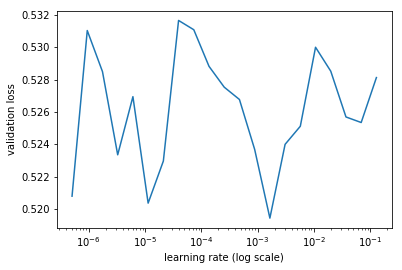

In [84]:
lrf=learn.lr_find(start_lr=1e-9, end_lr=10)
learn.sched.plot()

Validation loss is much lower than training loss. This is a sign of underfitting. Cycle_len=1 may be too short. Let's set cycle_mult=2 to find better parameter.

In [85]:
# When you are under fitting, it means cycle_len=1 is too short (learning rate is getting reset before it had the chance to zoom in properly).
learn.fit(1e-2, 3, cycle_len=1) # 1+2+4 = 7 epochs

epoch      trn_loss   val_loss   accuracy                  
    0      0.53871    0.612978   0.749767  
    1      0.54187    0.614596   0.751628                  
    2      0.535008   0.612283   0.750698                  


[array([0.61228]), 0.7506976659353389]

Training loss and validation loss are getting closer and smaller. We are on right track.

In [37]:
log_preds, y = learn.TTA() # (5, 2044, 120), (2044,)
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.5330396475770925, 1.3259945803139326)

In [64]:
len(data.val_ds.y), data.val_ds.y[:5]

(1075, array([1, 1, 1, 1, 1]))

In [86]:
learn.fit(1e-3, 1, cycle_len=2) # 1+1 = 2 epochs

epoch      trn_loss   val_loss   accuracy                  
    0      0.530726   0.613472   0.753488  
    1      0.526358   0.609563   0.750698                  


[array([0.60956]), 0.7506976724779884]

[[282  27  43]                               
 [ 44 184 120]
 [ 34  24 317]]


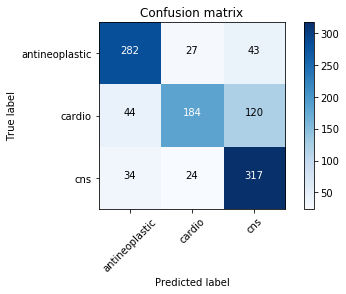

In [68]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

plot_confusion_matrix(cm, data.classes)

In [70]:
learn.save('224_3cls_unf_bs80')

In [71]:
learn.load('224_3cls_unf_bs80')

In [44]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.5259911894273128, 1.3275131736628687)

In [72]:
learn.unfreeze()

In [79]:
lr=np.array([5e-5,5e-4,5e-3])

In [74]:
learn.set_data(get_data(299, 48)) 

 94%|█████████▍| 85/90 [01:06<00:04,  1.21it/s, loss=1.39] 

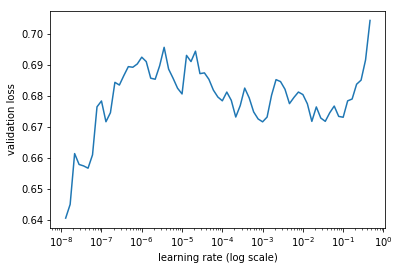

In [78]:
lrf=learn.lr_find(start_lr=1e-9, end_lr=10)
learn.sched.plot()

In [80]:
learn.fit(lr, 3, cycle)

epoch      trn_loss   val_loss   accuracy                  
    0      0.682825   0.67513    0.725581  
    1      0.681779   0.669802   0.724651                  
    2      0.665875   0.668171   0.723721                  
    3      0.675664   0.668802   0.71814                   
    4      0.674737   0.66029    0.731163                  
    5      0.657659   0.658051   0.736744                  
    6      0.63473    0.662198   0.72093                   


[array([0.6622]), 0.7209302371601726]

In [53]:
learn.save('299_3cls_unf_bs48')

In [54]:
learn.load('299_3cls_unf_bs48')

In [ ]:
learn.fit(lr, 10, cycle_len=1, cycle_mult=2)

 27%|██▋       | 51/190 [00:36<01:35,  1.45it/s, loss=1.38]

This dataset is so similar to ImageNet dataset. Training convolution layers doesn't help much. We are not going to unfreeze.

## Create submission

https://youtu.be/9C06ZPF8Uuc?t=1905

In [ ]:
data.classes

In [ ]:
data.test_ds.fnames

In [ ]:
log_preds, y = learn.TTA(is_test=True) # use test dataset rather than validation dataset
probs = np.mean(np.exp(log_preds),0)
#accuracy_np(probs, y), metrcs.log_loss(y, probs) # This does not make sense since test dataset has no labels

In [ ]:
probs.shape # (n_images, n_classes)

In [ ]:
df = pd.DataFrame(probs)
df.columns = data.classes

In [ ]:
df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])

In [ ]:
df.head()

In [ ]:
SUBM = f'{PATH}/subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)

In [ ]:
FileLink(f'{SUBM}subm.gz')

## Individual prediction

In [ ]:
fn = data.val_ds.fnames[0]
fn

In [ ]:
Image.open(PATH + fn).resize((150, 150))

In [ ]:
# Method 1.
trn_tfms, val_tfms = tfms_from_model(arch, sz)
ds = FilesIndexArrayDataset([fn], np.array([0]), val_tfms, PATH)
dl = DataLoader(ds)
preds = learn.predict_dl(dl)
np.argmax(preds)

In [ ]:
learn.data.classes[np.argmax(preds)]

In [ ]:
# Method 2.
trn_tfms, val_tfms = tfms_from_model(arch, sz)
im = val_tfms(open_image(PATH + fn)) # open_image() returns numpy.ndarray
preds = learn.predict_array(im[None])
np.argmax(preds)